<a href="https://colab.research.google.com/github/Trickshotblaster/nn-practices/blob/main/PytorchRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
import torch

In [137]:
import matplotlib.pyplot as plt

In [138]:
#linear regression
num_points = 60
def generate_linear_data(num_points, noise_std=1.0):
    # Generate random x-coordinates
    x = torch.arange(-num_points // 2, num_points // 2) * 0.1

    # Generate corresponding y-coordinates with cubic relationship and add noise
    a, b = torch.randn(2)  # Random coefficients
    y = a * x + b + noise_std * torch.randn(num_points)

    return x, y
xs, ys = generate_linear_data(num_points, noise_std = 0.5)

# y = ax + b
a, b = torch.randn(2)
params = [a,b]
for p in params:
  p.requires_grad = True
#training loop
num_epochs = 1000
lr = 0.05
for epoch in range(num_epochs):
  outs = (a * xs) + b
  loss = ((ys - outs) ** 2).mean()
  for p in params:
    p.grad = None
  loss.backward()
  for p in params:
    p.data -= p.grad * lr
print(loss.item())

0.24434047937393188


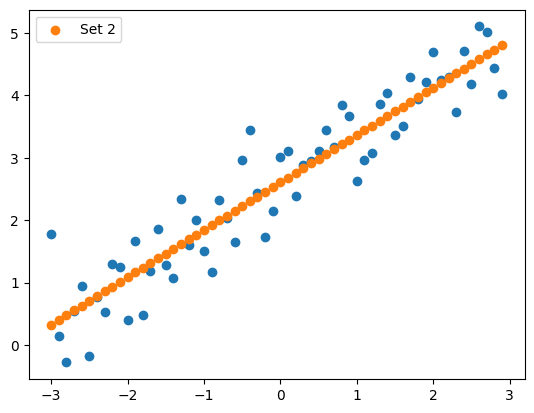

In [139]:
with torch.no_grad():
  ypred = (a*xs) + b
  plt.scatter(xs, ys)
  plt.scatter(xs, ypred, label="Set 2")

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [140]:
# cubic regression
num_points = 60

# Generate random data with a cubic relationship and add noise
def generate_cubic_data(num_points, noise_std=1.0):
    # Generate random x-coordinates
    x = torch.arange(-num_points // 2, num_points // 2) * 0.1

    # Generate corresponding y-coordinates with cubic relationship and add noise
    a, b, c, d = torch.randn(4)  # Random coefficients
    y = a * x**3 + b * x**2 + c * x + d + noise_std * torch.randn(num_points)

    return x, y

xs, ys = generate_cubic_data(num_points, noise_std=1)
# y = ax**3 + bx**2 + cx + d
a, b, c, d = torch.randn(4)
params = [a,b,c,d]
for p in params:
  p.requires_grad = True
#training loop
def g(x):
  return a * x**3 + b * x**2 + c * x + d
num_epochs = 10000
lr = 0.001
for epoch in range(num_epochs):
  outs = g(xs)
  loss = ((ys - outs) ** 2).mean()
  for p in params:
    p.grad = None
  loss.backward()
  for p in params:
    p.data -= p.grad * lr

print(loss.item())

0.8193721771240234


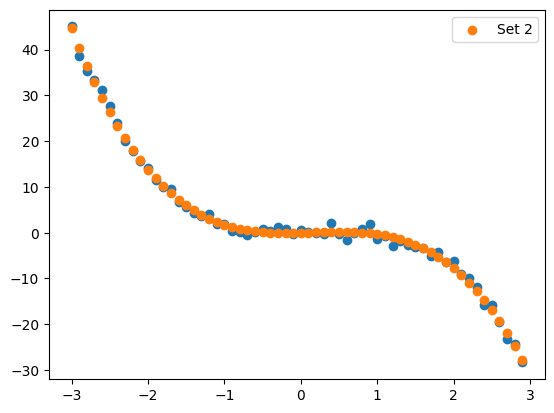

In [141]:
with torch.no_grad():
  ypred = g(xs)
  plt.scatter(xs, ys)
  plt.scatter(xs, ypred, label="Set 2")

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [142]:
g(0)

tensor(-0.0219, grad_fn=<AddBackward0>)

lol take that Texas Instruments